<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.4/MathJax.js?config=TeX-AMS_HTML-full"></script>

# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек 

Выполнил студент гр. 9383 Гладких Андрей, вариант 89.



## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод

Основной идеей данного метода является разбиение искомого числа ${a^n}$ на произведение ${a}$ в некоторых степенях. Результат считается по следующим правилам:
- Слева направо просматривается бинарная запись числа ${n}$ без первого бита. Пускай результ будет храниться в переменной ${t}$, которая изначально равняется ${a}$.
- Если текущий бит - это ${1}$, то число ${t}$ возводится в квадрат, а полученное число затем еще раз умножается на ${a}$. То есть ${t := (t * t) * a}$.
- Если текущий бит - это ${0}$, то число ${t}$ возводится в квадрат. То есть ${t := t * t}$.

Количество операций умножения при использовании данного метода равно ${\lambda (n) + \nu (n) - 1}$, где ${\lambda (n) = \left \lfloor lb(n) \right \rfloor}$, а ${\nu(n)}$ - вес Хэмминга для бинарного представления числа ${n}$, то есть число **не**нулевых битов в двоичной записи числа 

### Метод множителей

Этот метод базируется на вышеописанном бинарном методе. Дано число ${a}$ и  степень ${n}$, в которую это число предстоит возвести. Допустим, возможно посчитать ${a^i}$ за ${m}$ операций, а ${b^j}$ за ${n}$ операций, где ${b = a^i}$. Тогда утверждается, что ${a^{i \cdot j}}$ можно посчитать за ${(m + n)}$ операцию. 
Переменная ${i}$ - наименьший простой множитель ${n}$. Если же ${n}$ - простое число, то сперва считается ${a^{n-1}}$, которое затем дополнительно умножается на ${a}$.

### Аддитивная цепочка

Аддитивная цепочка — последовательность натуральных чисел ${a_0, a_1, a_2, ..., a_m = n}$, в которой первый элемент всегда равен ${1}$, а каждый последующий элемент является суммой каких-то двух предшествующих элементов. То есть:
- ${a_0 = 1}$ 
- ${\forall i > 0, a_i = a_j + a_k , j,k < i}$ - шаг аддитивной цепочки.

Шаги бывают следующие:
- ${i}$-шаг - удвоение, если ${j = k = i - 1}$
- ${i}$-шаг - звездный, если ${j = i - 1}$, ${k = \overline{0 .. (i-1)}}$
- ${i}$-шаг - малый, если ${\lambda(a_i) = \lambda(a_{i-1})}$

### Алгоритм Брауэра для вычисления приближённых аддитивных цепочек

Данный алгоритм вычисляет ${a^n}$ за ${lb(n) + \frac{(1 + \mathcal{O}(1)) * lb(n)}{lb(lb(n))}}$ операций.

Цепочки Брауэра для числа ${n}$ и вручную выбранного параметра ${k}$ выглядят следующим образом:

${B_k(n) = \begin{cases}
1, 2, 3, ..., 2^k - 1 & \text{ if } n < 2^k \\ 
B_k(q), 2q, 4q, ..., 2^k q, n & \text{ if } n \geq 2^k, q = \left \lfloor \frac {n}{2^k} \right \rfloor
\end{cases}}$

Иными словами, мы представляем ${n}$ в следующем виде:

${n = \sum_{i=0}^{j} a_i  2^{ik}, a_j \ne 0}$

Длина соответствующей цепочки равняется:

${l_B(n) = j(k+1) + 2^k - 2, jk \leq lbn < (j+1)k}$ для ${k \sim lb(lb(n)) - 2lb(lb(lb(n)))}$

Сам алгоритм следующий:
- Даны числа n, k.
- Выполняется вычисление вспомогательные чисел. ${d := 2^k, q_1 = \left [ \frac{n}{d} \right ], r_1 = n \% d}$, то есть ${n = q_1 d + r_1, 0 \leq r_1 < d}$
- Далее считаем: ${q_2 = \left [ \frac{q_1}{d} \right ], r_2 = q_1 \%d \Leftrightarrow q_1 = q_2 d + r_2}$
- Делаем так до тех пор, пока не получится ${q_s < d \Rightarrow q_{s-1} = q_s d + r_s}$ 

В итоге получим: ${n = 2^k q_1 + r_1 = 2^k(2^k q_2 + r_2) + r_1 = ... = 2^k(2^k(...(2^kq_s + r_s)...) + r_2) + r_1}$

После этого возьмем тривиальную Брауэровскую цепочку ${B_k(n) = 1, 2, 3, ..., 2^k -1}$ и будем ее дополнять:
${B_k(n) = 1, 2, 3, ..., 2^k - 1, 2q_s, 4q_s, 8q_s,..., 2^k q_s, 2^k q_s + r_s, ..., n}$

Сразу заметим возможные оптимизации:
- В случае ${n < 2^k}$ достаточно цепочки ${\left\{ 1, 2, 3, ..., b\right\}}$, где ${b = \max\left\{q_s, r_i\right\}}$ ${i = \overline{1..s}}$.
- Можно опускать операции, в которых ${r_i = 0}$.

### Звездная цепочка.

Звездная цепочка - это аддитивная цепочка, включающая только звездные шаги.

${l^{*}(n)}$ - минимальная звездная цепочка. Очевидно, что ${l^{*}(n) \geq l(n)}$

### Алгоритм дробления вектора индексов

Данный алгоритм находит минимальную звездную цепочку для числа ${n}$.

Пусть у нас есть звездная цепочка длины ${l(n) = m-1}$
Тогда для каждой такой звездной цепочки можно задать вектор индексов вида ${\left \{ r_1, r_2, ..., r_{m-1} \right \} : r_i = \left\{x: 1 \leq x \leq i\right\}}$. Тогда можно записать наш шаг в виде ${a_i = a_{i-1} + a_{r_{i-1}}}$.

Для поиска минимальной звездной цепочки осуществим перебор. Если осуществлять его в лоб, то число операций будет равно ${(m-1)!}$, что предельно много. Для уменьшения числа операций разделим наш вектор индексов на две части - фиксированную и менящийся остаток: ${\left\{r_i\right\}_{i=1}^q \cup \left\{\rho_i\right\}_{j=q+1}^m}$, где ${\rho_{j} = \left\{ x : 1 \leq x \leq j \right\}}$.

Заметим также, что наибольший ${a_m}$ будет получаться в цепочке ${\left\{r_i\right\}_{i=1}^q \cup \left\{q+1, q+2, ..., m\right\}}$, а наименьший ${\left\{r_i\right\}_{i=1}^q \cup \left\{1, 1,..., 1\right\}}$. Соответственно, получаем формулы:
- ${a_{min} = a_{q+1} + m - q}$
- ${a_{max} = a_{q+1} \cdot 2^{m-q}}$

В итоге алгоритм выглядит следующим образом: будем рассматривать аддитивные цепочки с длиной ${m}$, где ${\underline{l}(n) \leq m \leq \bar{l}(n)}$, при этом ${\underline{l}(n) = \lfloor lb(n) \rfloor}$ и ${\bar{l}(n) = \lambda(n) + \nu(n) - 1}$.
Выберем целое ${q: 1 \leq q \leq m - 1}$. Пусть ${q}$ будет ${\frac{n}{2}}$. Затем переберем все векторы индексов ${\left\{r_i\right\}_{i=1}^q}$ - всего шагов будет ${q!}$ штук, на каждом шаге строим звездную цепочку и вычисляем ${a_{min}}$ и ${a_{max}}$.
- Если ${a_m = n}$, то задача решена
- Если ${n \notin [a_{min}, a_{max}]}$, то переходим к следующему набору ${\left\{r_i\right\}}$.
- Если ${n \in [a_{min}, a_{max}]}$, то начинаем перебирать меняющийся кусок вектора индексов ${\left\{\rho_i\right\}_{j=q+1}^m}$. Всего их ${\frac{m!}{q!}}$. Строим звездные цепочки.
 - Если для построенных звездных цепочек ${a_m = n}$, то задача решена.
 - Если все ${\left\{\rho_i\right\}}$ просмотрены, то переходим к следующему набору  ${\left\{r_i\right\}}$.
- Если дошли до ${\left\{1,1,...,1\right\}\cup\left\{1,1,...,1\right\}}$, то есть не нашли такую цепочку, в которой ${a_m = n}$, то увеличиваем m на ${1}$ и начинаем перебор сначала.

### Теорема Брауэра и ее следствия

При некотором ${k < lb(lb(n))}$ справедливо следующее неравенство ${l(n) < (1 + k^{-1})\left \lceil lb(n) \right \rceil + 2^{k-1} - k + 2}$.

Следствие 1. Если ${k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))}$, то ${\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1}$

Следствие 2. Наименьшая верхняя оценка: ${\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{\mathcal{O}(\lambda(\lambda(\lambda(n))))}{{\lambda(\lambda(n))}^2}}$

### Гипотеза Шольца-Брауэра
Гипотеза Шольца-Брауэра заключается в следующем: ${l^*(2^n-1) \leq l^*(n)+n-1}$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для ${x^n}$, где ${n >= 30}$, для 2-3 значений ${n}$ (значения ${n}$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра ${k}$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при ${n>500}$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить теорему Брауэра для ${n=1..200}$ путём построения функции ${l(n)}$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5. Проверить гипотезу Шольца–Брауэра для ${1\leq n \leq 10}$ на алгоритме дробления вектора индексов. Сделать выводы.

## Решение задач вычисления степеней бинарным методом и методом множителей

### Бинарный метод

In [10]:
def binaryMethod(x, n):
    tmp = x
    bin_bez1 = bin(n)[3:]
    amount_steps = 0
    for step in bin_bez1:
        if step == '1':
            tmp = x * tmp ** 2
            amount_steps += 2
        elif step == '0':
            tmp = tmp ** 2
            amount_steps += 1
    return (tmp, amount_steps)

### Метод множителей

In [11]:
def isPrime(n):
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def minPrime(n):
    for i in range(2, n + 1):
        if n % i == 0 and isPrime(i):
            return i
    return 1

def coefMethod(x, n):
    i_deg = minPrime(n)
    
    tmp, steps = binaryMethod(x, i_deg)
    res, steps2 = binaryMethod(tmp, n // i_deg)

    return (res, steps + steps2)

### Сравнение

Таблица сравнения результатов работы бинарного метода и метода множителей. Для удобства результаты были помечены:
- Зеленым цветом, если бинарный метод потребовал меньшее количество шагов.
- Красным цветом, если метод множителей оказалася быстрее.

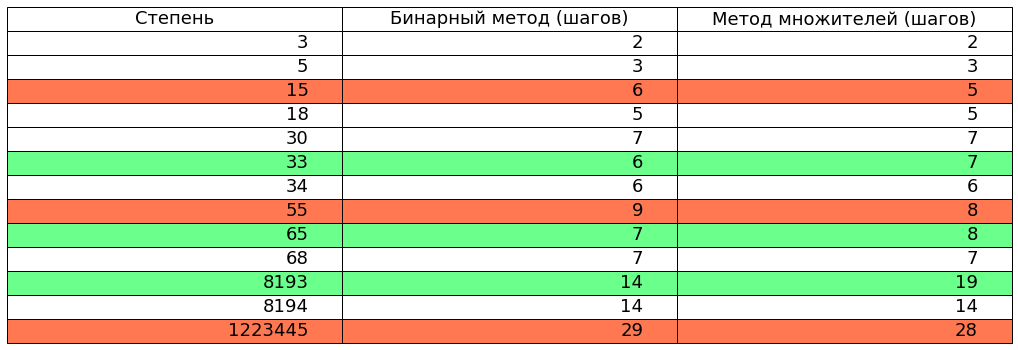

In [12]:
import matplotlib.pyplot as plt
x = 20

y = [3, 5, 15, 18, 30, 33, 34, 55, 65, 68, 8193, 8194, 1223445]

columns = ("Степень", "Бинарный метод (шагов)", "Метод множителей (шагов)")

cell_text = []
for i in range(len(y)):
    cell_text.append([y[i], binaryMethod(x, y[i])[1],coefMethod(x, y[i])[1] ])
    
colors = []

for row in cell_text:
    if row[1] < row[2]:
        colors.append(["#6bff8c","#6bff8c", "#6bff8c"])
    elif row[1] == row[2]:
        colors.append(["w","w", "w"])
    else:
        colors.append(["#ff7852","#ff7852", "#ff7852"])


table = plt.table(cellText=cell_text, cellColours=colors, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

### Выводы

Как и предполагалось, в среднем метод множителей возводит число в заданную степень либо за то же количество операций, что и бинарный метод, либо за меньшее число. Исключениями являются лишь степени вида ${n = 2^k + 1}$, в которых бинарный метод оказывается быстрее.

## Реализация алгоритма Брауэра

In [6]:
def utility(n, k):
    q_arr = []
    r_arr = []
    d = 2**k
    q_arr.append(n // d)
    r_arr.append(n % d)
    
    while q_arr[-1] >= d:
        r_arr.append(q_arr[-1] % d)
        q_arr.append(q_arr[-1] // d)
    r_arr.append(q_arr[-1] % d)
    
    return (q_arr, r_arr)

def BrauerChain(n, k, B_arr, q_arr, r_arr, ind=0):
    if n < 2**k:
        for i in range(1, max(q_arr[-1], max(r_arr)) + 1):
            B_arr.append(i)
    else:
        q = q_arr[ind]
        ind += 1
        q_cur = q
        BrauerChain(q, k, B_arr, q_arr, r_arr, ind)
        for i in range(k):
            q_cur *=2
            B_arr.append(q_cur)
            
        if n!= q_cur:    
            B_arr.append(n)
    return B_arr

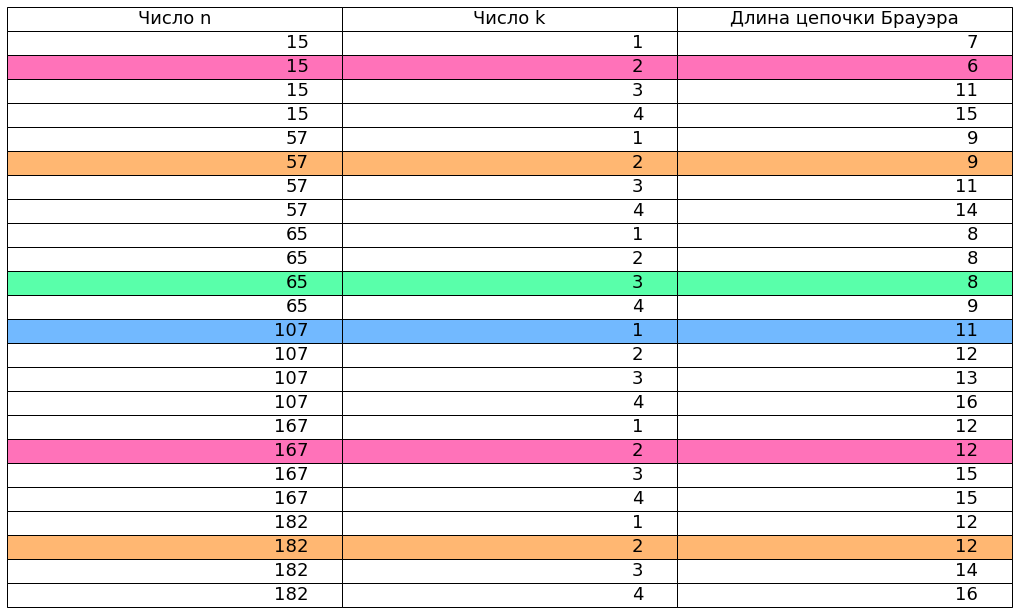

In [8]:
n_arr = [15, 57, 65, 107, 167, 182]
k_min_for_n = []

k = [1, 2, 3, 4]

columns = ("Число n", "Число k", "Длина цепочки Брауэра")

cell_text = []
cell_text2 = []
for i in range(len(n_arr)):
    k_min = 1
    min_oper = n_arr[i]
    min_chain = []
    for j in range(len(k)):
        q_arr, r_arr = utility(n_arr[i], k[j])
        B_arr = BrauerChain(n_arr[i], k[j], [], q_arr, r_arr)
        if(len(B_arr) <= min_oper):
            min_oper = len(B_arr)
            k_min = j + 1
            min_chain = B_arr
        cell_text.append([n_arr[i], k[j], len(B_arr)])
        
    k_min_for_n.append(k_min)
    cell_text2.append([n_arr[i], len(indexVectorFraction(n_arr[i])), len(min_chain), k_min, min_chain,  ])
        
colors = []
color_palette = ["w", "w", "w", "w"]
color_accent = ["#ff72b9", "#ffb772", "#59ffaa", "#72b9ff"]
for i in range(len(n_arr)):
    for j in range(len(k)):
        if k[j] == k_min_for_n[i]:
            colors.append([color_accent[i % len(color_accent)], color_accent[i % len(color_accent)], color_accent[i % len(color_accent)]])
        else:
            colors.append([color_palette[i % len(color_palette)], color_palette[i % len(color_palette)], color_palette[i % len(color_palette)]])

table = plt.table(cellText=cell_text, cellColours=colors, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(3, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

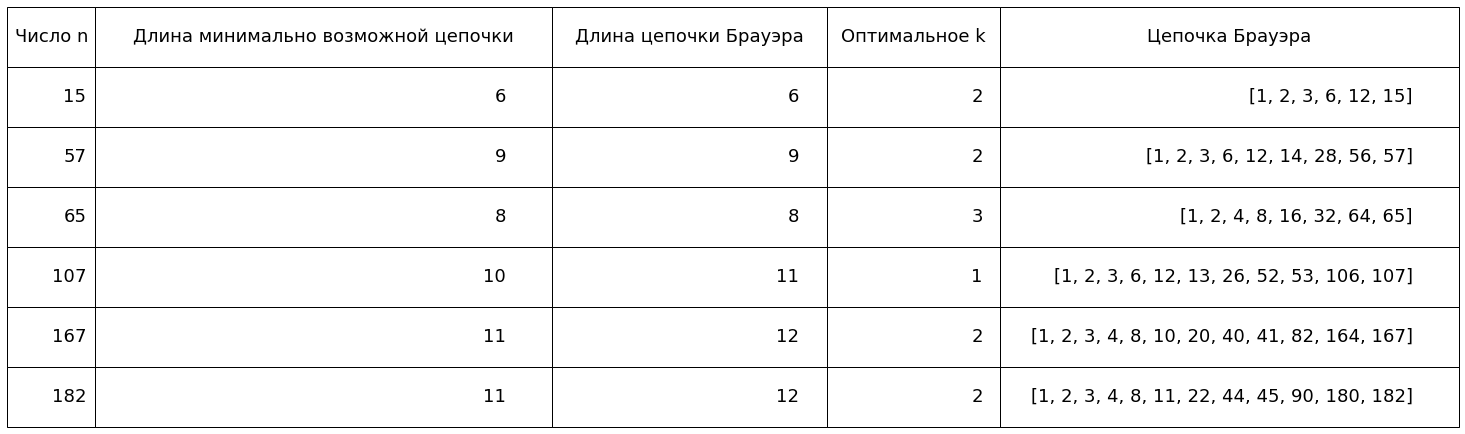

In [13]:
columns = ("Число n", "Длина минимально возможной цепочки", "Длина цепочки Брауэра", "Оптимальное k", "Цепочка Брауэра")
           
table = plt.table(cellText=cell_text2, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(7, 5)
table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(len(cell_text2))))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

### Выводы

По результатам эксперимента можно сделать выводы о том, что параметр k, как и ожидалось, влияет на длину получающейся цепочки Брауэра - в данном эксперименте длина цепочки Брауэра для одного и того же числа могла отличаться на 1-4 элемента в зависимости от k. Цепочка Брауэра иногда совпадала по длинне с минимально возможной цепочкой для заданного числа, но в остальных случаях была длиннее. Отсюда можно сделать выводы о том, что алгоритм Брауэра не гарантирует минимальность длины цепочки.

## Реализация метода дробления вектора индексов

In [1]:
import time

def lb(n):
    return log(n, 2)

def nu(n):
    return bin(n)[2:].count('1')

def l_low(n):
    return floor(lb(n))

def l_high(n):
    return l_low(n) + nu(n) - 1

def buildChain(r_arr, rho_arr):
    chain = [1]
    index_vector = r_arr + rho_arr
    for ind in index_vector:
        chain.append(chain[-1] + chain[ind - 1])
    return chain

def next_index_vector(arr, q=0):
    m = len(arr)
    for i in range(m - 1, -1, -1):
        if arr[i] != 1:
            arr[i] -= 1
            for j in range(i + 1, m):
                arr[j] =  q + j + 1
            return arr
    arr = [-1]
    return arr


def indexVectorFraction(n):
    for m in range(l_low(n) - 1, l_high(n) + 10):
        q = m // 2
        
        if q == 0:
            q = 1
        
        r_arr = [i for i in range(1, q + 1)]
        rho_arr = [(q + i) for i in range(1, m - q + 1)]     
        while(r_arr != [-1]):
            rho_arr = [(q + i) for i in range(1, m - q + 1)]
            chain = buildChain(r_arr, rho_arr)
            if chain[-1] == n:
                return chain
            a_min = chain[q + 1] + m - q
            a_max = chain[q + 1] * (2 ** (m - q))
            if n > a_min and n < a_max :
                while(rho_arr != [-1]):
                    rho_arr = next_index_vector(rho_arr, q)
                    chain = buildChain(r_arr, rho_arr)
                    if chain[-1] == n:
                        return chain
            r_arr = next_index_vector(r_arr)
    return chain

def calculateTime(n):
    start = time.time()
    ans = indexVectorFraction(n)
    end = time.time()
    return (ans, end - start)

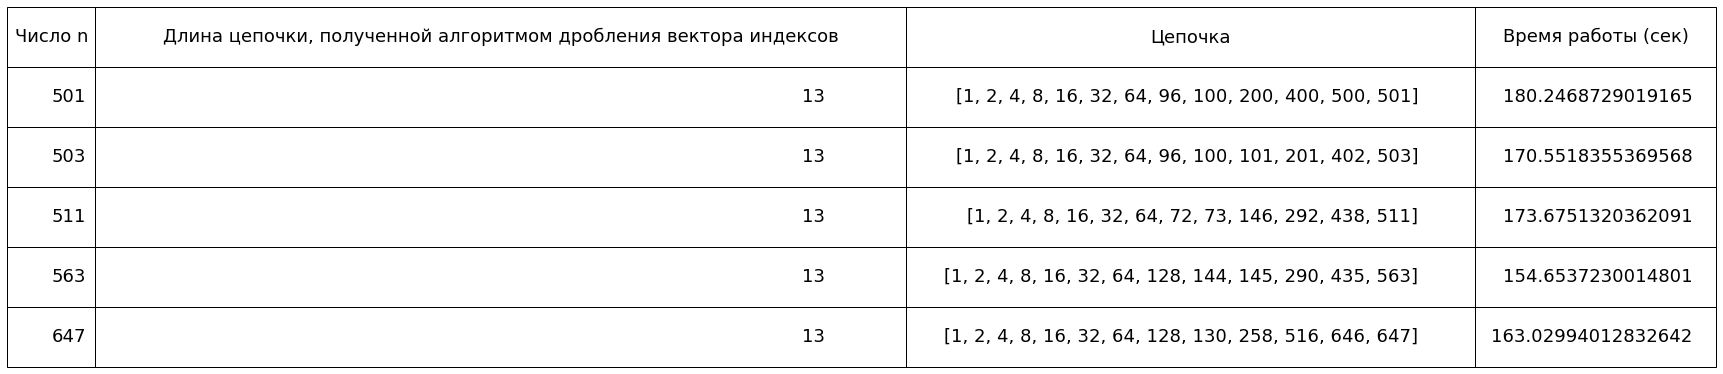

In [14]:
columns = ("Число n", "Длина цепочки, полученной алгоритмом дробления вектора индексов", "Цепочка", "Время работы (сек)")

n_arr = [501, 503, 511, 563, 647]
#n_arr = [15, 25, 76]

cell_text3 = []
for n_el in n_arr:
    ans, time_amount = calculateTime(n_el)
    cell_text3.append([n_el, len(ans), ans, time_amount])
    
     
table = plt.table(cellText=cell_text3, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(5, 5)
table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(len(cell_text3))))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

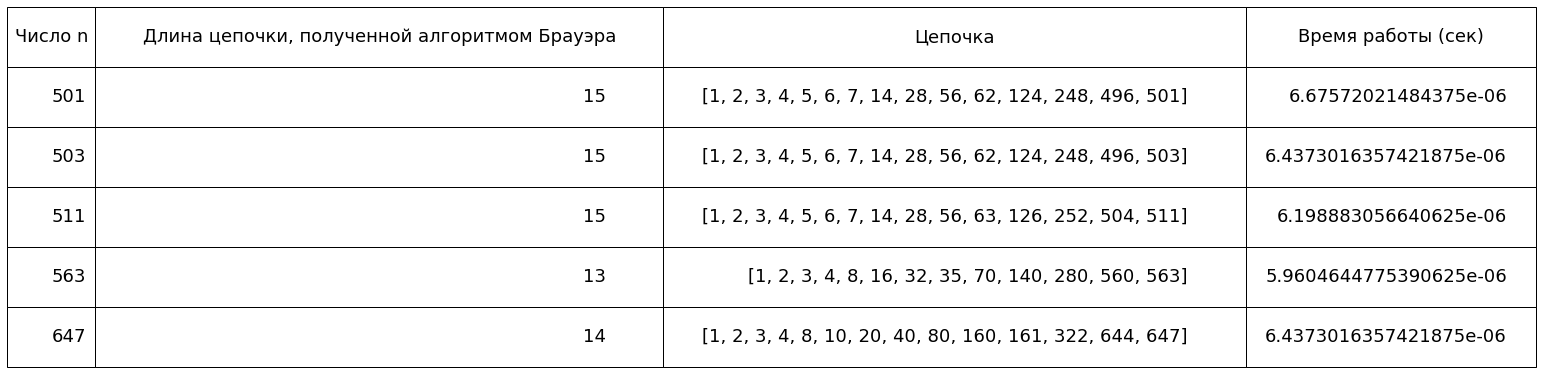

In [15]:
columns = ("Число n", "Длина цепочки, полученной алгоритмом Брауэра", "Цепочка", "Время работы (сек)")

n_arr = [501, 503, 511, 563, 647]
k_min_for_n = []

k = [1, 2, 3, 4]

cell_text3_2 = []
for i in range(len(n_arr)):
    k_min = 1
    min_oper = n_arr[i]
    min_chain = []
    min_time = 1000
    for j in range(len(k)):
        start = time.time()
        q_arr, r_arr = utility(n_arr[i], k[j])
        B_arr = BrauerChain(n_arr[i], k[j], [], q_arr, r_arr)
        time_res = time.time() - start
        if(len(B_arr) <= min_oper):
            min_oper = len(B_arr)
            k_min = j + 1
            min_chain = B_arr
            min_time = time_res
        
    k_min_for_n.append(k_min)
    cell_text3_2.append([n_arr[i], len(min_chain), min_chain, time_res])
    

      
table = plt.table(cellText=cell_text3_2, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(5, 5)
table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(len(cell_text3_2))))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

### Вывод

По результатам тестирования алгоритма дробления вектора индексов можно сделать выводы о том, что время работы данного алгоритма существенно превышает время работы алгоритма Брауэра, бинарного алгоритма и метода множителей, что объясняется его факториальной теоретической сложностью. При этом цепочка, полученная алгоритмом дробления вектора индексов действительно короче остальных цепочек.

## Проверка следствия 1 из теоремы Брауэра

In [35]:
maxN = 200
dots_first_ten = [1, 2, 3, 3, 4, 4, 5]
dots = dots_first_ten + [len(indexVectorFraction(i)) for i in range(8, maxN + 1)]

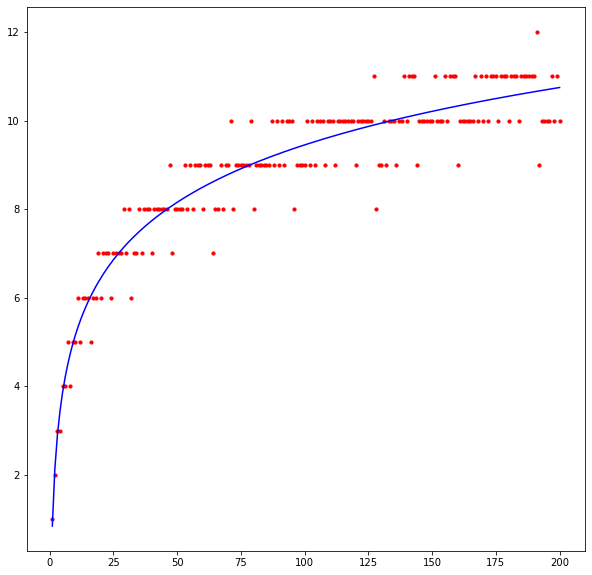

In [36]:
#https://mathworld.wolfram.com/LeastSquaresFittingLogarithmic.html
import numpy as np

def coef_a(y_arr):
    n = len(y_arr)
    y_arr = np.array(y_arr)
    x_arr = np.array(range(1, n + 1))

    x_log_arr = np.log(x_arr)
    numerator = n * np.sum(np.multiply(y_arr, x_log_arr)) - np.sum(y_arr) * np.sum(x_log_arr)
    denominator = n * np.sum(np.square(x_log_arr)) - np.sum(x_log_arr) * np.sum(x_log_arr)
    
    return numerator / denominator


def coef_b(y_arr, a):
    n = len(y_arr)
    y_arr = np.array(y_arr)
    x_arr = np.array(range(1, n + 1))
    x_log_arr = np.log(x_arr)
    
    numerator = np.sum(y_arr) - a * np.sum(x_log_arr)
    denominator = n
    
    return numerator / denominator

#f(x) = a*ln(x) + b
def func(a, b, x_arr):
    return a * np.log(x_arr) + b

a = coef_a(dots)
b = coef_b(dots, a)
n = len(dots)

dot_size = 10

plt.figure(figsize=(10, 10))
plt.scatter(range(1, n + 1), dots, s=dot_size, color = "red")
plt.plot(range(1, n + 1), func(a, b, range(1, n + 1)), color = 'blue')

plt.show()

### Вывод

По графику видно, что ${l(n)}$ аппроксимируется логарифмической кривой. По этой причине можно говорить о ее схожем с ${\lambda(n)}$ поведении на бесконечности. Данный факт подтверждает следствие 1 из теоремы Брауэра.

## Проверка гипотезы Шольца–Брауэра

In [80]:
n = 10
l_arr = [i + dots[i - 1] - 1 for i in range(2, n + 1)]
l_exp_arr = [dots[2**i - 1 - 1] for i in range(2, 8)]
l_exp_arr.append(len(indexVectorFraction(2**8 - 1)))
l_exp_arr.append(len(indexVectorFraction(2**9 - 1)))
l_exp_arr.append(len(indexVectorFraction(2**10 - 1)))


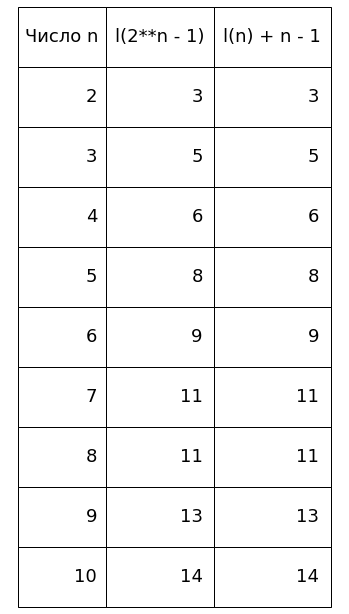

In [92]:
columns = ("Число n", "l(2**n - 1)", "l(n) + n - 1")

cell_text4 = []
for i in range(len(l_arr)):
    cell_text4.append([i + 2, l_exp_arr[i], l_arr[i]])
    
 
table = plt.table(cellText=cell_text4, colLabels=columns, loc='center')

table.set_fontsize(18)
table.scale(7, 5)
table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(len(cell_text4))))

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.draw()

### Вывод

Исходя из вышепредставленной таблицы можно сделать выводы о том, что гипотеза Шольца-Брауэра верна для ${2 \leq n \leq 10}$

## Общий вывод по проделанной работе

В ходе работы были изучены и применены на практике теоретические сведения об аддитивных цепочках и об алгоритмах нахождения аддитивных цепочек для заданного числа. Были реализованы бинарный метод, метод множителей, алгоритм Брауэра и алгоритм дробления вектора индексов, который работает медленнее вышеописанных, но гарантированно выводит минимально возможную цепочку для заданного числа. Также в ходе работы были проверены на практике следствие 1 из теоремы Брауэра и гипотеза Шольца-Брауэра.